# Ransomware Tracker Data Analysis with Pandas 

https://diaryofarjun.com

In [1]:
import pandas as pd

In [2]:
url = "https://ransomwaretracker.abuse.ch/feeds/csv/"
df = pd.read_csv(url, encoding="latin-1", skiprows=8)

In [3]:
df.shape

(13866, 10)

In [4]:
df.head()

,# Firstseen (UTC),Threat,Malware,Host,URL,Status,Registrar,IP address(es),ASN(s),Country
0,2018-08-12 00:46:13,C2,Locky,83.217.11.193,http://83.217.11.193/linuxsucks.php,offline,NaN,83.217.11.193,199669,RU
1,2018-08-10 05:43:15,C2,Locky,pagaldaily.com,http://pagaldaily.com/apache_handler.php,offline,Danesco Trading Ltd.,185.82.217.102,59729,BG
2,2018-08-10 05:43:15,C2,Locky,185.82.217.102,http://185.82.217.102/apache_handler.php,offline,NaN,185.82.217.102,59729,BG
3,2018-08-09 16:50:50,C2,Locky,91.226.92.204,http://91.226.92.204/checkupdate,offline,NaN,91.226.92.204,12389,RU
4,2018-08-09 07:16:22,C2,Locky,80.87.202.49,http://80.87.202.49/information.cgi,offline,NaN,80.87.202.49,29182,RU


In [5]:
df.tail()

,# Firstseen (UTC),Threat,Malware,Host,URL,Status,Registrar,IP address(es),ASN(s),Country
13861,2015-03-07 13:46:58,C2,CryptoWall,drdigitalmd.com,http://drdigitalmd.com/img1.php,offline,PDR LTD. D/B/A PUBLICDOMAINREGISTRY.COM,192.210.234.140,36352,US
13862,2015-03-04 12:10:59,C2,CryptoWall,rajsima87.com,http://rajsima87.com/img2.php,offline,"eNom, Inc.",NaN,NaN,NaN
13863,2015-03-02 04:14:59,C2,CryptoWall,jauregia.net,http://jauregia.net/img5.php,offline,"TECNOCRATICA CENTRO DE DATOS, S.L.",185.92.246.115,201446,ES
13864,2015-03-02 01:18:48,C2,CryptoWall,lzclient.com,http://lzclient.com/img4.php,offline,"eNom, Inc.",NaN,NaN,NaN
13865,# of entries: 13865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.drop(df.tail(1).index,inplace=True)
df.tail()

,# Firstseen (UTC),Threat,Malware,Host,URL,Status,Registrar,IP address(es),ASN(s),Country
13860,2015-03-30 09:57:07,C2,CryptoWall,daffamedia.com,http://daffamedia.com/wp-content/plugins/wp_mo...,offline,MAFF Inc.,156.237.138.234,134548,US
13861,2015-03-07 13:46:58,C2,CryptoWall,drdigitalmd.com,http://drdigitalmd.com/img1.php,offline,PDR LTD. D/B/A PUBLICDOMAINREGISTRY.COM,192.210.234.140,36352,US
13862,2015-03-04 12:10:59,C2,CryptoWall,rajsima87.com,http://rajsima87.com/img2.php,offline,"eNom, Inc.",NaN,NaN,NaN
13863,2015-03-02 04:14:59,C2,CryptoWall,jauregia.net,http://jauregia.net/img5.php,offline,"TECNOCRATICA CENTRO DE DATOS, S.L.",185.92.246.115,201446,ES
13864,2015-03-02 01:18:48,C2,CryptoWall,lzclient.com,http://lzclient.com/img4.php,offline,"eNom, Inc.",NaN,NaN,NaN


In [7]:
df.shape

(13865, 10)

In [8]:
list(df.columns)

['# Firstseen (UTC)',
 'Threat',
 'Malware',
 'Host',
 'URL',
 'Status',
 'Registrar',
 'IP address(es)',
 'ASN(s)',
 'Country']

In [9]:
columns = {'# Firstseen (UTC)': 'Firstseen', 'IP address(es)': 'IPs', 'ASN(s)':'ASNs'}
df = df.rename(columns=columns)

In [10]:
df.head()

,Firstseen,Threat,Malware,Host,URL,Status,Registrar,IPs,ASNs,Country
0,2018-08-12 00:46:13,C2,Locky,83.217.11.193,http://83.217.11.193/linuxsucks.php,offline,NaN,83.217.11.193,199669,RU
1,2018-08-10 05:43:15,C2,Locky,pagaldaily.com,http://pagaldaily.com/apache_handler.php,offline,Danesco Trading Ltd.,185.82.217.102,59729,BG
2,2018-08-10 05:43:15,C2,Locky,185.82.217.102,http://185.82.217.102/apache_handler.php,offline,NaN,185.82.217.102,59729,BG
3,2018-08-09 16:50:50,C2,Locky,91.226.92.204,http://91.226.92.204/checkupdate,offline,NaN,91.226.92.204,12389,RU
4,2018-08-09 07:16:22,C2,Locky,80.87.202.49,http://80.87.202.49/information.cgi,offline,NaN,80.87.202.49,29182,RU


In [11]:
s_dt = '2018-08-12 00:46:13'
type(s_dt)

str

In [12]:
import datetime
o_dt = datetime.datetime.strptime(s_dt,'%Y-%m-%d %H:%M:%S')
type(o_dt)

datetime.datetime

In [13]:
s1_dt = o_dt.strftime("%d-%m-%Y")
s1_dt

'12-08-2018'

In [14]:
type(s1_dt)

str

In [15]:
df['Firstseen'] = df['Firstseen'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S').strftime("%d-%m-%Y"))

In [16]:
df.head()

,Firstseen,Threat,Malware,Host,URL,Status,Registrar,IPs,ASNs,Country
0,12-08-2018,C2,Locky,83.217.11.193,http://83.217.11.193/linuxsucks.php,offline,NaN,83.217.11.193,199669,RU
1,10-08-2018,C2,Locky,pagaldaily.com,http://pagaldaily.com/apache_handler.php,offline,Danesco Trading Ltd.,185.82.217.102,59729,BG
2,10-08-2018,C2,Locky,185.82.217.102,http://185.82.217.102/apache_handler.php,offline,NaN,185.82.217.102,59729,BG
3,09-08-2018,C2,Locky,91.226.92.204,http://91.226.92.204/checkupdate,offline,NaN,91.226.92.204,12389,RU
4,09-08-2018,C2,Locky,80.87.202.49,http://80.87.202.49/information.cgi,offline,NaN,80.87.202.49,29182,RU


In [17]:
df.groupby('Threat').size().sort_values(ascending=False)

Threat
Distribution Site    11297
Payment Site          1660
C2                     908
dtype: int64

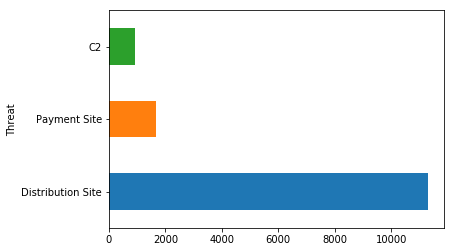

In [19]:
df.groupby(['Threat']).size().sort_values(ascending=False).plot(kind='barh')

In [20]:
df.head()

,Firstseen,Threat,Malware,Host,URL,Status,Registrar,IPs,ASNs,Country
0,12-08-2018,C2,Locky,83.217.11.193,http://83.217.11.193/linuxsucks.php,offline,NaN,83.217.11.193,199669,RU
1,10-08-2018,C2,Locky,pagaldaily.com,http://pagaldaily.com/apache_handler.php,offline,Danesco Trading Ltd.,185.82.217.102,59729,BG
2,10-08-2018,C2,Locky,185.82.217.102,http://185.82.217.102/apache_handler.php,offline,NaN,185.82.217.102,59729,BG
3,09-08-2018,C2,Locky,91.226.92.204,http://91.226.92.204/checkupdate,offline,NaN,91.226.92.204,12389,RU
4,09-08-2018,C2,Locky,80.87.202.49,http://80.87.202.49/information.cgi,offline,NaN,80.87.202.49,29182,RU


In [21]:
df['Firstseen_year'] = df['Firstseen'].apply(lambda x: datetime.datetime.strptime(x,'%d-%m-%Y').strftime("%Y"))
df.dtypes

Firstseen         object
Threat            object
Malware           object
Host              object
URL               object
Status            object
Registrar         object
IPs               object
ASNs              object
Country           object
Firstseen_year    object
dtype: object

In [22]:
df['Firstseen_year'] = df['Firstseen_year'].astype('datetime64[ns]')
df.dtypes

Firstseen                 object
Threat                    object
Malware                   object
Host                      object
URL                       object
Status                    object
Registrar                 object
IPs                       object
ASNs                      object
Country                   object
Firstseen_year    datetime64[ns]
dtype: object

In [23]:
df['Firstseen_year'] = df['Firstseen_year'].dt.year
df[['Firstseen','Firstseen_year']].head()

,Firstseen,Firstseen_year
0,12-08-2018,2018
1,10-08-2018,2018
2,10-08-2018,2018
3,09-08-2018,2018
4,09-08-2018,2018


In [24]:
df.dtypes

Firstseen         object
Threat            object
Malware           object
Host              object
URL               object
Status            object
Registrar         object
IPs               object
ASNs              object
Country           object
Firstseen_year     int64
dtype: object

In [25]:
df[['Firstseen_year','Malware']].groupby('Firstseen_year').count().sort_values(by='Firstseen_year', ascending=False)

,Malware
Firstseen_year,
2018,35
2017,1297
2016,12496
2015,37


Text(0.5, 1.0, 'Yearly Malware Trend - Ransomware Tracker')

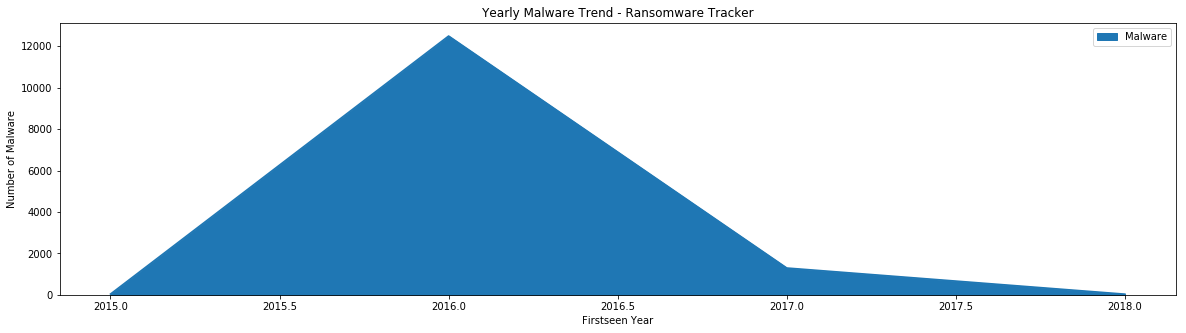

In [26]:
ax = df[['Firstseen_year','Malware']].groupby('Firstseen_year').count().sort_values(by='Firstseen_year', ascending=False).plot(kind='area', figsize=(20,5))
ax.set_xlabel("Firstseen Year")
ax.set_ylabel("Number of Malware")
ax.set_title("Yearly Malware Trend - Ransomware Tracker")

In [27]:
df.groupby(['Firstseen_year','Threat']).size()

Firstseen_year  Threat           
2015            C2                      37
2016            C2                     709
                Distribution Site    10441
                Payment Site          1346
2017            C2                     140
                Distribution Site      843
                Payment Site           314
2018            C2                      22
                Distribution Site       13
dtype: int64

Text(0.5, 1.0, 'Malware per Threat per Year - Ransomware Tracker')

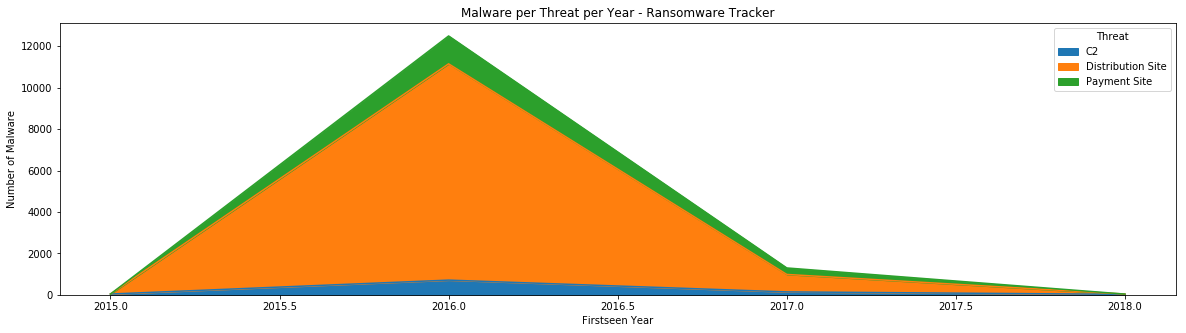

In [28]:
ax = df.groupby(['Firstseen_year','Threat']).size().unstack().plot(kind='area',stacked=True,figsize=(20,5))
ax.set_xlabel("Firstseen Year")
ax.set_ylabel("Number of Malware")
ax.set_title("Malware per Threat per Year - Ransomware Tracker")